## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.713205  1.555291  1.532277  0.339135 -0.460109  1.072056
1 -0.517469  0.691279 -0.848249 -1.065126 -0.526559 -0.569003
2  1.118971 -1.121301 -1.340507 -1.342711 -0.669122 -0.900846
3  1.193961 -1.654498 -0.323128  0.097280 -0.051558 -1.131359
4 -0.287560 -1.476087 -0.609706  1.017519  0.402461 -0.275218


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0628888	total: 57.8ms	remaining: 57.7s
1:	learn: 1.0541928	total: 58.4ms	remaining: 29.1s
2:	learn: 1.0451572	total: 58.8ms	remaining: 19.6s
3:	learn: 1.0342887	total: 60.2ms	remaining: 15s
4:	learn: 1.0259222	total: 60.7ms	remaining: 12.1s
5:	learn: 1.0147407	total: 61.4ms	remaining: 10.2s
6:	learn: 1.0036217	total: 61.9ms	remaining: 8.78s
7:	learn: 0.9930884	total: 62.5ms	remaining: 7.75s
8:	learn: 0.9844198	total: 63.1ms	remaining: 6.95s
9:	learn: 0.9761403	total: 63.6ms	remaining: 6.3s
10:	learn: 0.9671112	total: 64.3ms	remaining: 5.78s
11:	learn: 0.9569021	total: 64.8ms	remaining: 5.33s
12:	learn: 0.9491333	total: 65.3ms	remaining: 4.96s
13:	learn: 0.9394842	total: 65.9ms	remaining: 4.64s
14:	learn: 0.9302309	total: 66.5ms	remaining: 4.37s
15:	learn: 0.9233841	total: 67.2ms	remaining: 4.13s
16:	learn: 0.9159761	total: 67.8ms	remaining: 3.92s
17:	learn: 0.9073790	total: 68.4ms	remaining: 3.73s
18:	learn: 0.8976998	total: 68.8ms	remaining: 3

69:	learn: 0.5755143	total: 94.7ms	remaining: 1.26s
70:	learn: 0.5697479	total: 95.1ms	remaining: 1.24s
71:	learn: 0.5651011	total: 95.6ms	remaining: 1.23s
72:	learn: 0.5604261	total: 96.3ms	remaining: 1.22s
73:	learn: 0.5542160	total: 96.8ms	remaining: 1.21s
74:	learn: 0.5494314	total: 97.3ms	remaining: 1.2s
75:	learn: 0.5451604	total: 97.8ms	remaining: 1.19s
76:	learn: 0.5408972	total: 98.2ms	remaining: 1.18s
77:	learn: 0.5362074	total: 98.7ms	remaining: 1.17s
78:	learn: 0.5313711	total: 99.2ms	remaining: 1.16s
79:	learn: 0.5268718	total: 99.9ms	remaining: 1.15s
80:	learn: 0.5220145	total: 100ms	remaining: 1.14s
81:	learn: 0.5168150	total: 101ms	remaining: 1.13s
82:	learn: 0.5128535	total: 101ms	remaining: 1.12s
83:	learn: 0.5088744	total: 102ms	remaining: 1.11s
84:	learn: 0.5050160	total: 102ms	remaining: 1.1s
85:	learn: 0.5008762	total: 103ms	remaining: 1.09s
86:	learn: 0.4971167	total: 103ms	remaining: 1.08s
87:	learn: 0.4929785	total: 104ms	remaining: 1.07s
88:	learn: 0.4893780	t

242:	learn: 0.1631343	total: 187ms	remaining: 582ms
243:	learn: 0.1622499	total: 187ms	remaining: 581ms
244:	learn: 0.1611362	total: 188ms	remaining: 580ms
245:	learn: 0.1599381	total: 189ms	remaining: 578ms
246:	learn: 0.1585983	total: 189ms	remaining: 577ms
247:	learn: 0.1576155	total: 190ms	remaining: 575ms
248:	learn: 0.1567415	total: 190ms	remaining: 573ms
249:	learn: 0.1556059	total: 191ms	remaining: 572ms
250:	learn: 0.1546283	total: 191ms	remaining: 570ms
251:	learn: 0.1536883	total: 192ms	remaining: 569ms
252:	learn: 0.1527038	total: 192ms	remaining: 567ms
253:	learn: 0.1516270	total: 193ms	remaining: 565ms
254:	learn: 0.1507508	total: 193ms	remaining: 564ms
255:	learn: 0.1498090	total: 193ms	remaining: 562ms
256:	learn: 0.1487611	total: 194ms	remaining: 561ms
257:	learn: 0.1478073	total: 194ms	remaining: 559ms
258:	learn: 0.1470791	total: 195ms	remaining: 557ms
259:	learn: 0.1461081	total: 195ms	remaining: 556ms
260:	learn: 0.1452025	total: 196ms	remaining: 554ms
261:	learn: 

407:	learn: 0.0621001	total: 277ms	remaining: 402ms
408:	learn: 0.0617162	total: 277ms	remaining: 401ms
409:	learn: 0.0613504	total: 278ms	remaining: 400ms
410:	learn: 0.0609800	total: 279ms	remaining: 400ms
411:	learn: 0.0606276	total: 279ms	remaining: 399ms
412:	learn: 0.0602680	total: 280ms	remaining: 398ms
413:	learn: 0.0599237	total: 280ms	remaining: 397ms
414:	learn: 0.0597094	total: 281ms	remaining: 396ms
415:	learn: 0.0593559	total: 281ms	remaining: 395ms
416:	learn: 0.0590079	total: 282ms	remaining: 394ms
417:	learn: 0.0587766	total: 282ms	remaining: 393ms
418:	learn: 0.0585501	total: 283ms	remaining: 392ms
419:	learn: 0.0582068	total: 283ms	remaining: 391ms
420:	learn: 0.0578777	total: 284ms	remaining: 391ms
421:	learn: 0.0575429	total: 284ms	remaining: 390ms
422:	learn: 0.0573281	total: 285ms	remaining: 389ms
423:	learn: 0.0570010	total: 285ms	remaining: 388ms
424:	learn: 0.0567119	total: 286ms	remaining: 387ms
425:	learn: 0.0563945	total: 286ms	remaining: 386ms
426:	learn: 

583:	learn: 0.0300396	total: 368ms	remaining: 262ms
584:	learn: 0.0299018	total: 369ms	remaining: 262ms
585:	learn: 0.0298340	total: 369ms	remaining: 261ms
586:	learn: 0.0296530	total: 370ms	remaining: 260ms
587:	learn: 0.0295744	total: 370ms	remaining: 259ms
588:	learn: 0.0295305	total: 371ms	remaining: 259ms
589:	learn: 0.0294646	total: 371ms	remaining: 258ms
590:	learn: 0.0294052	total: 372ms	remaining: 257ms
591:	learn: 0.0292367	total: 372ms	remaining: 257ms
592:	learn: 0.0291637	total: 373ms	remaining: 256ms
593:	learn: 0.0290867	total: 374ms	remaining: 255ms
594:	learn: 0.0289454	total: 374ms	remaining: 255ms
595:	learn: 0.0288014	total: 375ms	remaining: 254ms
596:	learn: 0.0287259	total: 375ms	remaining: 253ms
597:	learn: 0.0286712	total: 376ms	remaining: 252ms
598:	learn: 0.0286301	total: 376ms	remaining: 252ms
599:	learn: 0.0284930	total: 377ms	remaining: 251ms
600:	learn: 0.0284557	total: 377ms	remaining: 250ms
601:	learn: 0.0284141	total: 377ms	remaining: 250ms
602:	learn: 

747:	learn: 0.0180885	total: 457ms	remaining: 154ms
748:	learn: 0.0180332	total: 458ms	remaining: 153ms
749:	learn: 0.0179425	total: 458ms	remaining: 153ms
750:	learn: 0.0179135	total: 459ms	remaining: 152ms
751:	learn: 0.0178984	total: 459ms	remaining: 151ms
752:	learn: 0.0178835	total: 460ms	remaining: 151ms
753:	learn: 0.0178236	total: 460ms	remaining: 150ms
754:	learn: 0.0177948	total: 461ms	remaining: 150ms
755:	learn: 0.0177665	total: 461ms	remaining: 149ms
756:	learn: 0.0176567	total: 462ms	remaining: 148ms
757:	learn: 0.0176421	total: 462ms	remaining: 148ms
758:	learn: 0.0176142	total: 463ms	remaining: 147ms
759:	learn: 0.0175056	total: 463ms	remaining: 146ms
760:	learn: 0.0174824	total: 464ms	remaining: 146ms
761:	learn: 0.0174157	total: 464ms	remaining: 145ms
762:	learn: 0.0173931	total: 465ms	remaining: 144ms
763:	learn: 0.0173708	total: 465ms	remaining: 144ms
764:	learn: 0.0173055	total: 465ms	remaining: 143ms
765:	learn: 0.0172359	total: 466ms	remaining: 142ms
766:	learn: 

926:	learn: 0.0104332	total: 547ms	remaining: 43ms
927:	learn: 0.0103788	total: 547ms	remaining: 42.5ms
928:	learn: 0.0103320	total: 548ms	remaining: 41.9ms
929:	learn: 0.0102711	total: 548ms	remaining: 41.3ms
930:	learn: 0.0102260	total: 549ms	remaining: 40.7ms
931:	learn: 0.0102033	total: 549ms	remaining: 40.1ms
932:	learn: 0.0101811	total: 550ms	remaining: 39.5ms
933:	learn: 0.0101649	total: 550ms	remaining: 38.9ms
934:	learn: 0.0101507	total: 551ms	remaining: 38.3ms
935:	learn: 0.0101349	total: 551ms	remaining: 37.7ms
936:	learn: 0.0100914	total: 552ms	remaining: 37.1ms
937:	learn: 0.0100696	total: 552ms	remaining: 36.5ms
938:	learn: 0.0100082	total: 553ms	remaining: 35.9ms
939:	learn: 0.0099855	total: 554ms	remaining: 35.3ms
940:	learn: 0.0099384	total: 554ms	remaining: 34.8ms
941:	learn: 0.0099249	total: 555ms	remaining: 34.2ms
942:	learn: 0.0098798	total: 555ms	remaining: 33.6ms
943:	learn: 0.0098360	total: 556ms	remaining: 33ms
944:	learn: 0.0098150	total: 556ms	remaining: 32.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

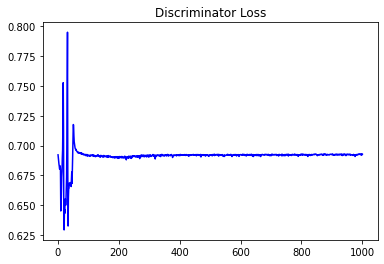

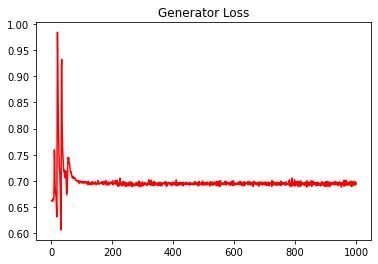

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05064004881832448


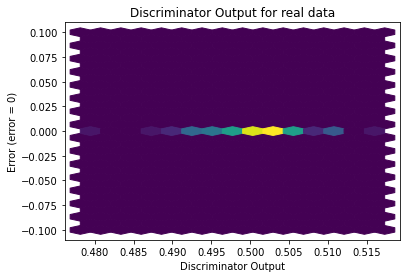

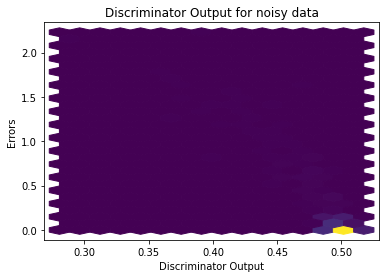

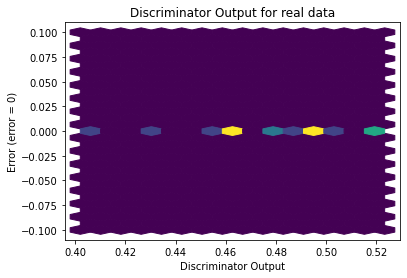

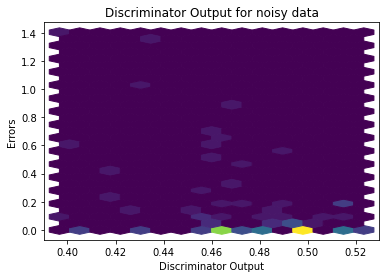

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


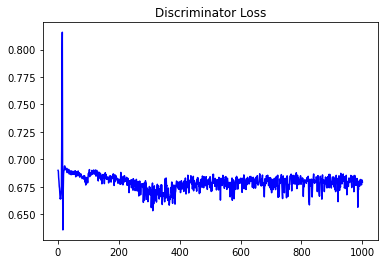

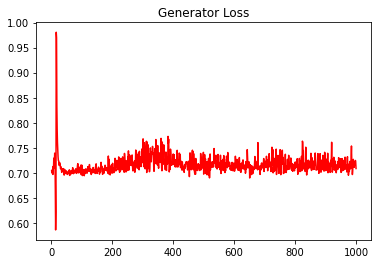

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03744913347069888


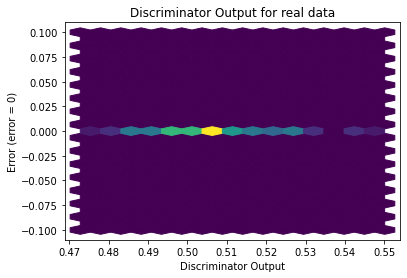

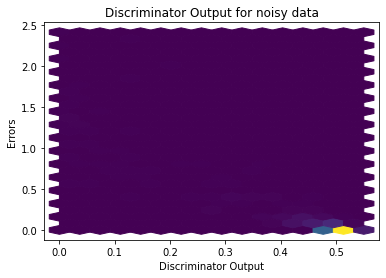

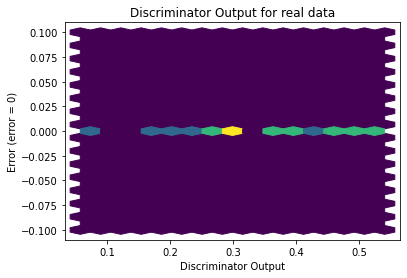

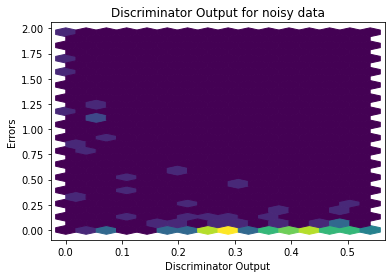

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1599]], requires_grad=True)
